In [1]:
# for data analysis
import pandas as pd 
import numpy as np

# for data visuals
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# for machine learning 
from sklearn.ensemble import RandomForestClassifier as RFclassifier


### Step 1: Reading data


In [2]:
trainData = pd.read_csv('processed_cleveland_data_train.csv')
testData = pd.read_csv('processed_cleveland_data_test.csv')


def replace_predict(df):
    df['num'] = df['num'].replace([1, 2, 3, 4, 5, 6], 1)
# replacing anything greater than 1 with 1 because it is a binary classification problem

       
replace_predict(trainData)
replace_predict(testData)



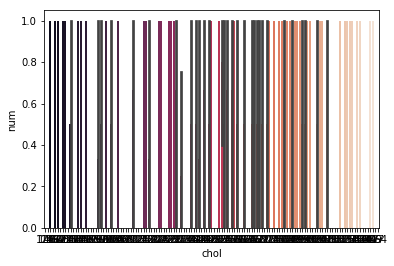

In [3]:

sns.barplot(x='chol', y='num', palette="rocket", data=trainData)


#### the train and test data sets are further seprated by thier features and the predicted diagnosis

In [4]:

Xtrain = trainData.drop(['num'], axis=1)
Ytrain = trainData['num']

Xtest = testData.drop(['num'], axis=1)
Ytest = testData['num']

Ytrain.head()

0    0
1    1
2    1
3    0
4    0
Name: num, dtype: int64

### Step 2: Define the model
 

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Create model

model = RFclassifier()

# Choose Parameters
parameters = {'n_estimators': [4,6,9,13,18],
             'max_features': ['log2', 'sqrt', 'auto'],
             'criterion': ['entropy', 'gini'],
             'max_depth': [1,16,32,32,26],
             'min_samples_split': [2, 3, 5, 8,12],
             'min_samples_leaf': [1, 2, 8, 10, 15]}



### Step 3: Compile the Model

In [6]:


# Type of scoring to compare parameter combos 
acc_scorer = make_scorer(accuracy_score)

# Run grid search 
# grid search is an algorthim which automatically finds the best paramters for a particular model
# grid search also decided which features to choose for tree
grid_obj = GridSearchCV(model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(Xtrain, Ytrain)

# Pick the best combination of parameters
model = grid_obj.best_estimator_




/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Sahithi/.conda/envs/dlenv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Step 4: Fit the Model

In [15]:
# Fit the best algorithm to the data, and decides choosen parameters 
model.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=32, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Step 5: Evaluate the Model

In [16]:
predictions = model.predict(Xtest)
accuracy= accuracy_score(Ytest, predictions)
print(accuracy)



0.819672131147541


### splitting all data to estimate the skill of the model, for evaluation. 4 training sets and 1 test set. ( 5 fold the more the folds the more the traning sets). Trying to get results through multiple iterations, how robust is our model?, took all data and split it

### Step 6: Cross Validation

In [9]:

# Cross Validation with KFold
from sklearn.model_selection import KFold

alldata = pd.read_csv('processed_cleveland_data.csv')
replace_predict(alldata)

Xall = alldata.drop(['num'], axis=1)
Yall = alldata['num']

def run_kfold(model):
    kf = KFold(n_splits=5)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(Xall):
        fold += 1
        Xtrain, Xtest = Xall.values[train_index], Xall.values[test_index]
        Ytrain, Ytest = Yall.values[train_index], Yall.values[test_index]
        model.fit(Xtrain, Ytrain)
        #print (Xtrain.shape)
        #print (Ytrain.shape)
        #print(Xtrain[0])
        print(Ytrain[0])
        predictions = model.predict(Xtest)
        print(predictions)
        accuracy = accuracy_score(Ytest, predictions)
        print(accuracy)
        outcomes.append(accuracy)
        print(outcomes)
        print("Fold {0} accuracy: {1}".format(fold, accuracy)) 
        mean_outcome = np.mean(outcomes)
        print("Mean Accuracy: {0}".format(mean_outcome)) 
        
run_kfold(model)
    

1
[1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
0.7833333333333333
[0.7833333333333333]
Fold 1 accuracy: 0.7833333333333333
Mean Accuracy: 0.7833333333333333
0
[1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1]
0.9
[0.7833333333333333, 0.9]
Fold 2 accuracy: 0.9
Mean Accuracy: 0.8416666666666667
0
[1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1]
0.847457627118644
[0.7833333333333333, 0.9, 0.847457627118644]
Fold 3 accuracy: 0.847457627118644
Mean Accuracy: 0.8435969868173258
0
[1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0]
0.8305084745762712
[0.7833333333333333, 0.9, 0.847457627118644, 0.8305084745762712]
Fold 4 accuracy: 0.8305084745762712
Mean Accuracy: 0.8403248587570621
0
[0 0 0 0 0 1 1 0 0 1 

### Save Model

In [10]:
import pickle
filename = '/Users/Sahithi/HeartModels/HeartDiseaseML.pickle'
pickle.dump(model, open(filename, 'wb'))